In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sef_triangulaire = [(1, 0), (4, 1), (6, 0)]
sef_trapezoidal = [(1, 0), (4, 1), (6, 1), (8, 0)]
sef_quelconque = [(1, 0), (4, 1), (6, 0.6), (7, 0.3), (9, 1), (10, 0.5), (15, 0)]

# Opérations de base

In [3]:
def f(sef, x):
    
    intervalle = None
    
    for i in range(len(sef) - 1):
        if sef[i][0] <= x <= sef[i + 1][0]:
            intervalle = (sef[i], sef[i + 1])
            break
        
    if intervalle is None:
        return 0
    
    x1, y1 = intervalle[0]
    x2, y2 = intervalle[1]

    if x1 == x2:
        return y1

    pente = (y2 - y1) / (x2 - x1)
    
    return y1 + pente * (x - x1)

In [4]:
f(sef_quelconque, 2)

0.3333333333333333

In [5]:
def plot_sef(sef, title=""):
    plt.figure(figsize=(10, 6))
    x_coords, y_coords = zip(*sef)
    
    plt.scatter(x_coords, y_coords, color='red', marker='o')

    plt.plot(x_coords, y_coords, color="blue")

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

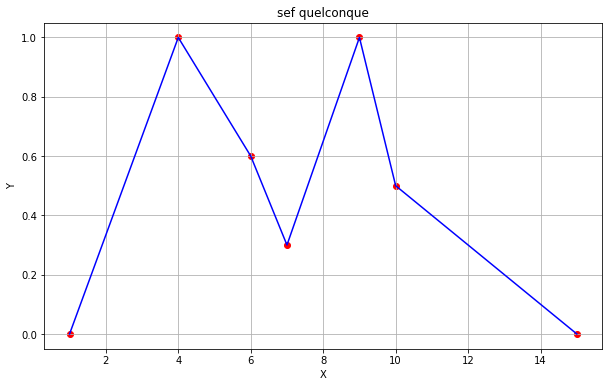

In [6]:
plot_sef(sef_quelconque, "sef quelconque")

# Opérations ensemblistes

In [7]:
def complementaire(sef):
    c_sef = []
    
    for (x, y) in sef:
        c_sef.append((x, 1 - y))
        
    return c_sef

In [8]:
sef_comp_quel = complementaire(sef_quelconque)

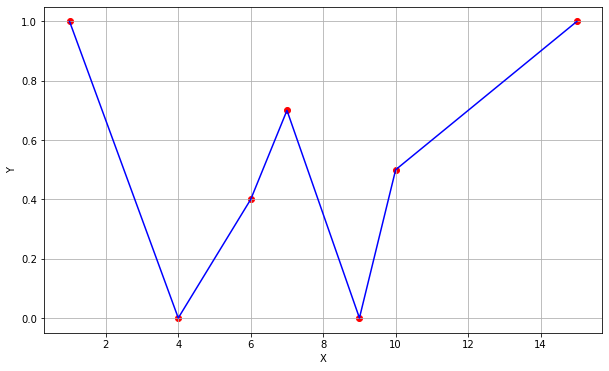

In [9]:
plot_sef(sef_comp_quel)

In [91]:
def plot_sefs(A, B, C=None, func_name="op", title=""):
    
    n = 3
    if C == None:
        n = 2
    fig, axs = plt.subplots(1, n, figsize=(15, 5))
    
    x_coords_A, y_coords_A = zip(*A)
    axs[0].scatter(x_coords_A, y_coords_A, marker='o')
    axs[0].plot(x_coords_A, y_coords_A)
    axs[0].set_title("F1")
    axs[0].set_xlabel("X")
    axs[0].set_ylabel("Y")
    
    x_coords_B, y_coords_B = zip(*B)
    axs[1].scatter(x_coords_B, y_coords_B, marker='o')
    axs[1].plot(x_coords_B, y_coords_B)
    axs[1].set_title("F2")
    axs[1].set_xlabel("X")
    axs[1].set_ylabel("Y")
    
    if C != None:
        x_coords_C, y_coords_C = zip(*C)

        axs[2].plot(x_coords_A, y_coords_A, label="F1")
        axs[2].plot(x_coords_B, y_coords_B, label="F2")

        axs[2].scatter(x_coords_C, y_coords_C, marker='o')
        axs[2].plot(x_coords_C, y_coords_C, label=f"{func_name}(F1, F2)")
        axs[2].set_title(f"{func_name}(F1, F2)")
        axs[2].set_xlabel("X")
        axs[2].set_ylabel("Y")
        axs[2].legend()  
    else:
        axs[1].set_title(f"{func_name}(F1)")
    
    plt.tight_layout()
    fig.suptitle(title)
    
    plt.show()

In [92]:
class TNorme:
    pass
    
class TProbabiliste(TNorme):
    def __call__(self, x, y):
        return x * y
    
class TLukaseiwicz(TNorme):
    def __call__(self, x, y):
        return max(x + y - 1, 0)
    
    
class TZadeh(TNorme):
    def __call__(self, x, y):
        return min(x, y)
    
class THamacher(TNorme):
    def __call__(self, x, y):
        if x == y == 0: return 0
        return (x * y) / (x + y - x * y)
    
class TDrastique(TNorme):
    def __call__(self, x, y):
        if x == 1: return y
        if y == 1: return x
        return 0

In [93]:
class TCoNorme:
    pass
    
class CoProbabiliste(TCoNorme):
    def __call__(self, x, y):
        return x + y - x * y 
    
class CoLukaseiwicz(TCoNorme):
    def __call__(self, x, y):
        return min(x + y, 1)
    
class CoZadeh(TCoNorme):
    def __call__(self, x, y):
        return max(x, y)
    
class CoHamacher(TCoNorme):
    def __call__(self, x, y):
        return (x + y) / (1 + x * y)
    
class CoDrastique(TCoNorme):
    def __call__(self, x, y):
        if x == 0: return y
        if y == 0: return x
        return 1
    

In [94]:
def apply_ens(A, B, T, step):
    x_coords_A, y_coords_A = zip(*A)
    x_coords_B, y_coords_B = zip(*B)
    
    x_min = min(min(x_coords_A), min(x_coords_B))
    x_max = max(max(x_coords_A), max(x_coords_B))
    
    r_sef = []
    
    for x in np.arange(x_min, x_max + step, step):
        f_a = f(A, x)
        f_b = f(B, x)
        r_sef.append((x, T(f_a, f_b)))
        
    return r_sef

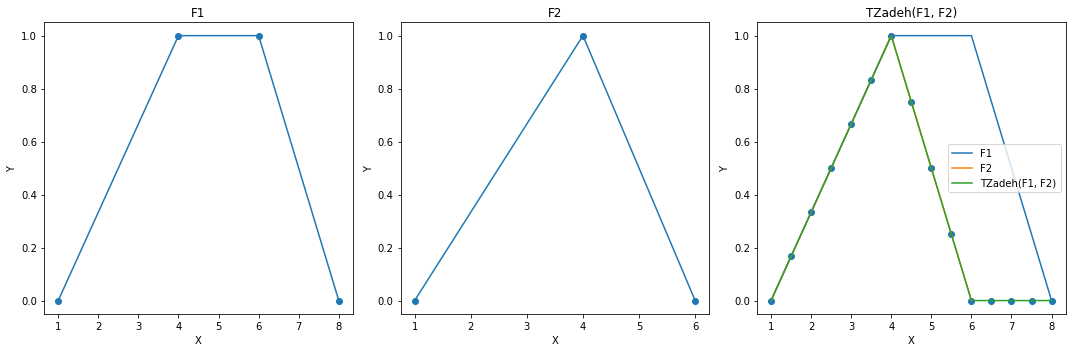

In [95]:
intersec_min = apply_ens(sef_trapezoidal, sef_triangulaire, TZadeh(), 0.5)
plot_sefs(sef_trapezoidal, sef_triangulaire, intersec_min, "TZadeh")

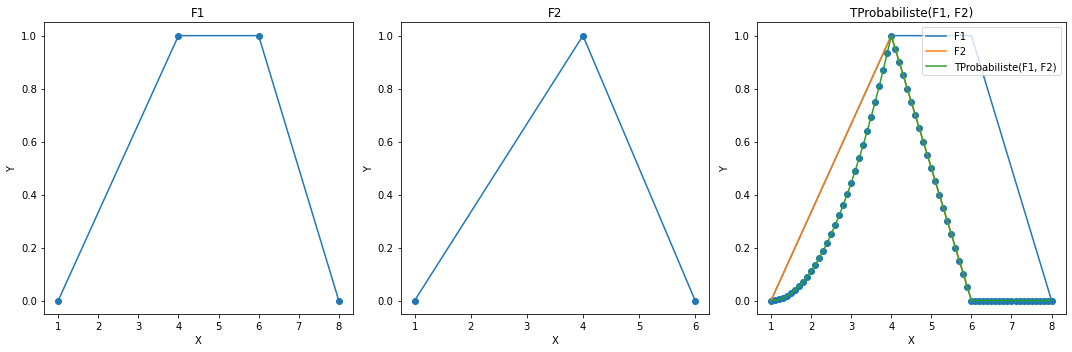

In [96]:
intersec_prod = apply_ens(sef_trapezoidal, sef_triangulaire, TProbabiliste(), 0.1)
plot_sefs(sef_trapezoidal, sef_triangulaire, intersec_prod, "TProbabiliste")

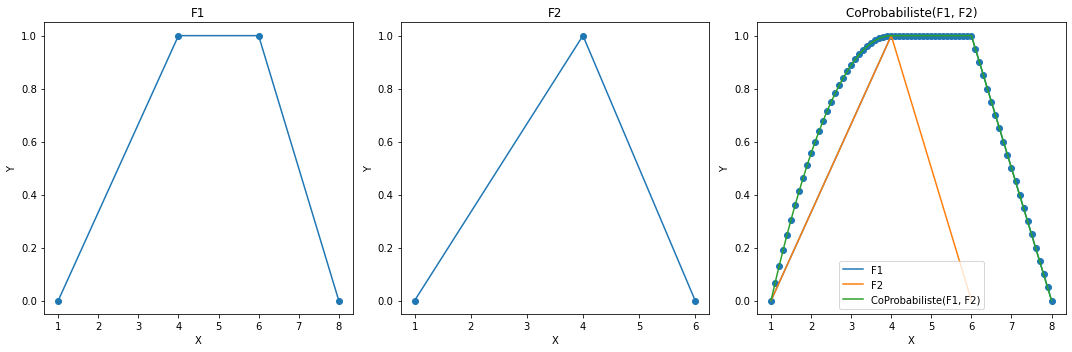

In [97]:
union_prod = apply_ens(sef_trapezoidal, sef_triangulaire, CoProbabiliste(), 0.1)
plot_sefs(sef_trapezoidal, sef_triangulaire, union_prod, "CoProbabiliste")

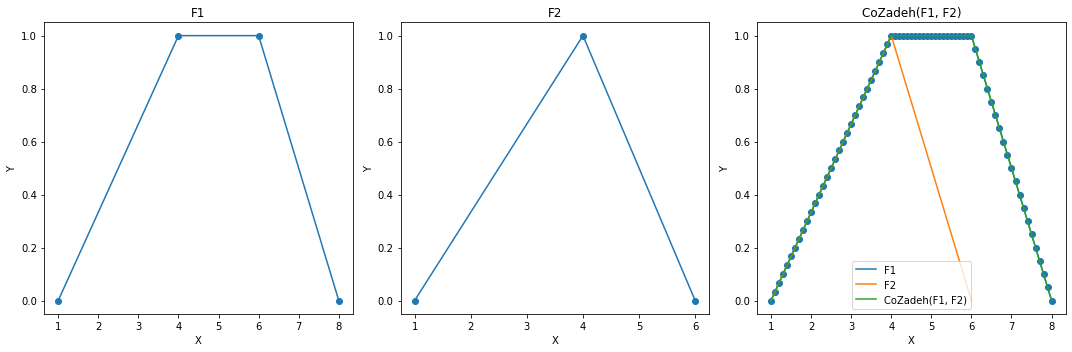

In [98]:
union_zadeh = apply_ens(sef_trapezoidal, sef_triangulaire, CoZadeh(), 0.1)
plot_sefs(sef_trapezoidal, sef_triangulaire, union_zadeh, "CoZadeh")

In [99]:
A = sef_triangulaire
Ac = complementaire(sef_triangulaire)

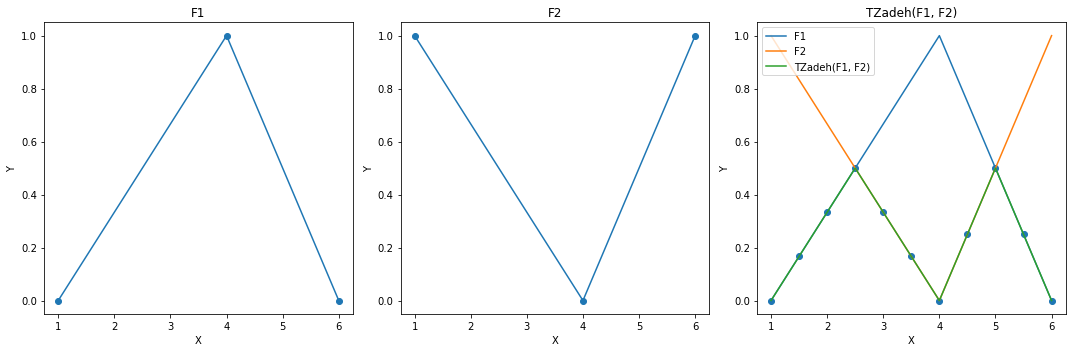

In [100]:
A_Ac = apply_ens(A, Ac, TZadeh(), 0.5)
plot_sefs(A, Ac, A_Ac, "TZadeh")

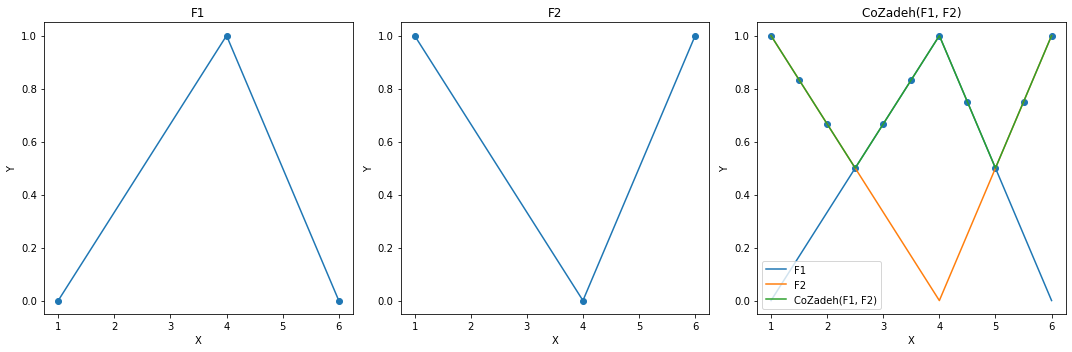

In [101]:
A_Ac = apply_ens(A, Ac, CoZadeh(), 0.5)
plot_sefs(A, Ac, A_Ac, "CoZadeh")

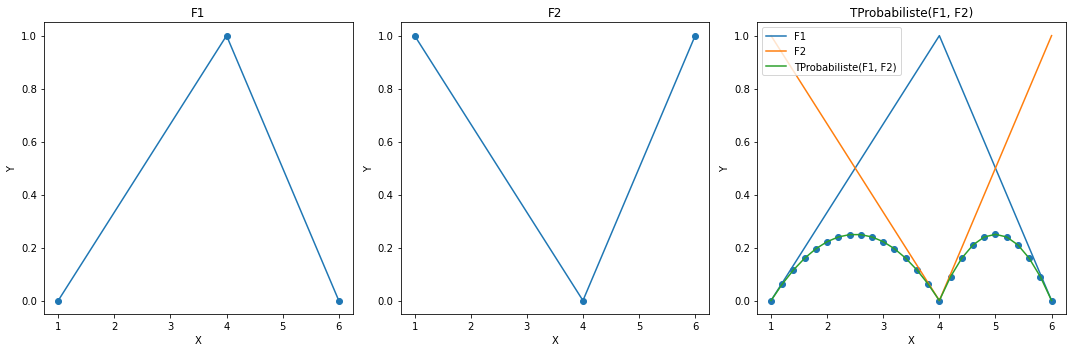

In [102]:
A_Ac = apply_ens(A, Ac, TProbabiliste(), 0.2)
plot_sefs(A, Ac, A_Ac, "TProbabiliste")

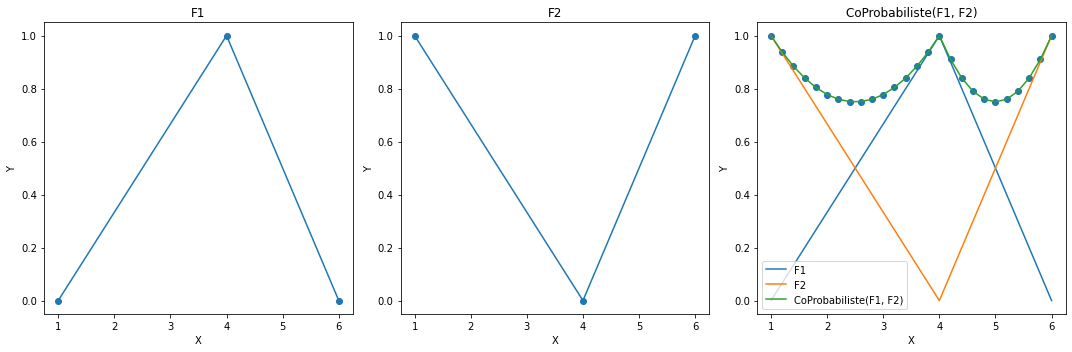

In [103]:
A_Ac = apply_ens(A, Ac, CoProbabiliste(), 0.2)
plot_sefs(A, Ac, A_Ac, "CoProbabiliste")

# Principe d'extension

In [104]:
class Phi:
    def calcule(self, x):
        pass
    
    def antecedent(self, y):
        pass

In [105]:
class Carre(Phi):
    def calcule(self, x):
        return x ** 2
    
    def antecedent(self, y):
        if y < 0:
            return []
        
        return [np.sqrt(y), -np.sqrt(y)] 

In [106]:
def extension(A, phi, step):
    
    x_coords_A, _ = zip(*A)
    
    y_min = np.inf
    y_max = - np.inf
    
    for x in x_coords_A:
        phi_x = phi.calcule(x)
        
        if phi_x < y_min:
            y_min = phi_x
        
        if phi_x > y_max:
            y_max = phi_x
            
    r_ex = []
    
    for y in np.arange(y_min, y_max + step, step):
        ant = phi.antecedent(y)
        
        if ant == []:
            r_ex.append((y, 0))
            
        else:
            fb_y = max(list(map(lambda x: f(A, x), ant)))
            r_ex.append((y, fb_y))
            
    return r_ex

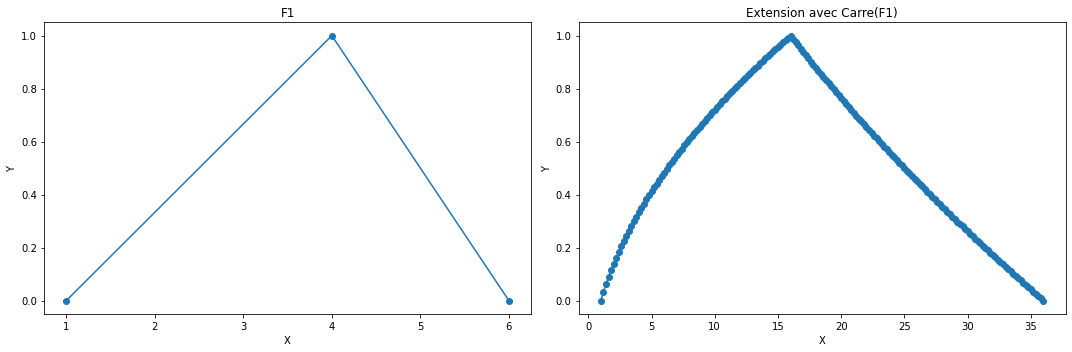

In [109]:
A_ext = extension(sef_triangulaire, Carre(), 0.2)
plot_sefs(sef_triangulaire, A_ext, func_name="Extension avec Carre")

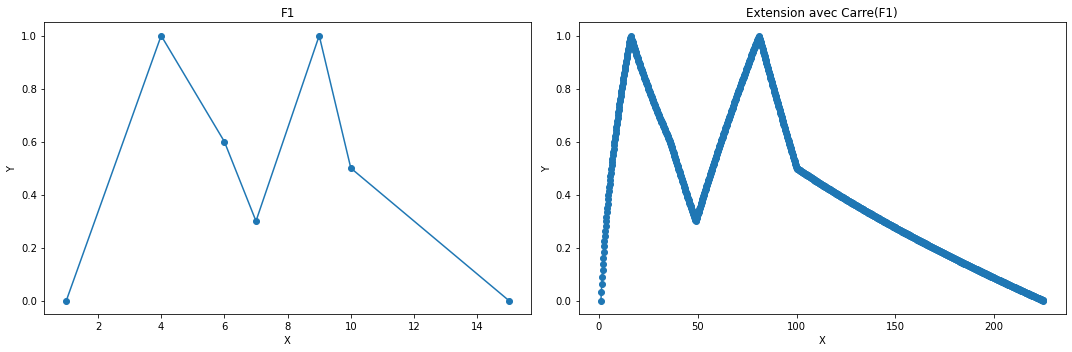

In [110]:
A_ext = extension(sef_quelconque, Carre(), 0.2)
plot_sefs(sef_quelconque, A_ext, func_name="Extension avec Carre")

# Opérations logiques

In [127]:
def MPGa_b(A, B, x0, F, T, step):
    x_coords_B, y_coords_B = zip(*B)
    
    x_min = min(x_coords_B)
    x_max = max(x_coords_B)
    
    a = f(A, x0)
    r_imp = []

    for x in np.arange(x_min, x_max + step, step):
        fb_x = f(B, x)
        r_imp.append((x, F(a, fb_x)))
        
    return r_imp       

In [128]:
def lukasiewicz(u, v):
    return min(1 - u + v, 1)

def brouwer_godel(u, v):
    return 1 if u <= v else v

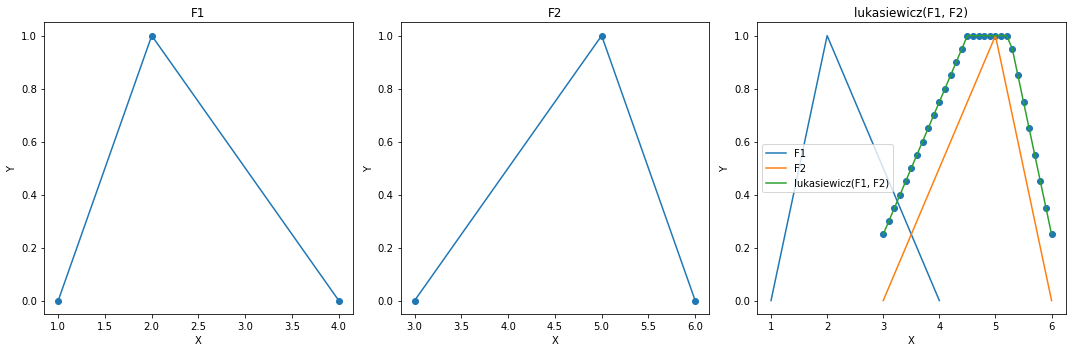

In [131]:
A = [(1, 0), (2, 1), (4, 0)]
B = [(3, 0), (5, 1), (6, 0)]
x0 = 2.5
A_B = MPGa_b(A, B, x0, lukasiewicz, TProbabiliste(), 0.1)
plot_sefs(A, B, A_B, func_name="lukasiewicz")

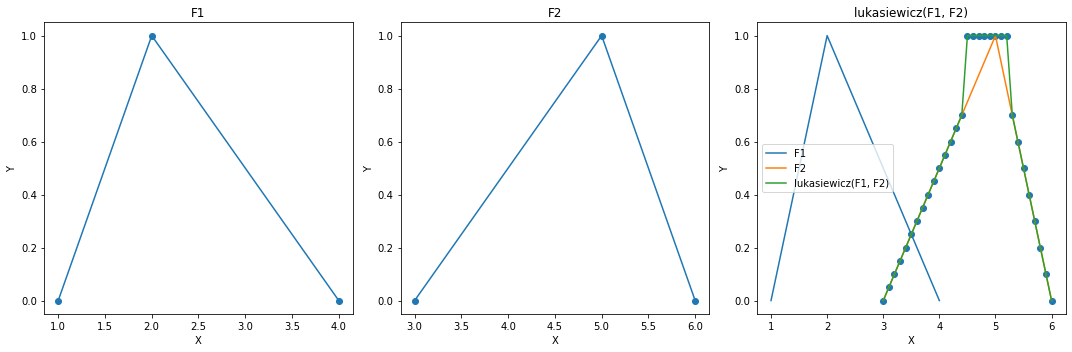

In [133]:
A = [(1, 0), (2, 1), (4, 0)]
B = [(3, 0), (5, 1), (6, 0)]
x0 = 2.5
A_B = MPGa_b(A, B, x0, brouwer_godel, TProbabiliste(), 0.1)
plot_sefs(A, B, A_B, func_name="lukasiewicz")

In [134]:
def MPG(A, B, Ap, F, T, step):
    x_coords_B, y_coords_B = zip(*B)
    x_coords_A, y_coords_A = zip(*A)
    
    x_B_min = min(x_coords_B)
    x_B_max = max(x_coords_B)
    
    x_A_min = min(x_coords_A)
    x_A_max = max(x_coords_A)
    
    r_mpg = []
    for y in np.arange(x_B_min, x_B_max + step, step):
        
        sups = []
        for x in np.arange(x_A_min, x_A_max + step, step):
            f_ap_x = f(Ap, x)
            f_a_x = f(A, x)
            f_b_y = f(B, y)
            
            sups.append(T(f_ap_x, F(f_a_x, f_b_y)))
        
        r_mpg.append((y, max(sups)))
    
    return r_mpg

Nous allons d'abord vérifier le fonctionnement de notre fonction en la comparant au cas unitaire avec $x_0$. Pour ce faire, nous allons tenter d'approximer une fonction Dirac centrée en $x_0$ et observer les résultats du MPG généralisé.

In [135]:
A = [(1, 0), (2, 1), (4, 0)]
Ap = [(1, 0), (2.49, 0), (2.5, 1), (2.51, 0), (4, 0)]

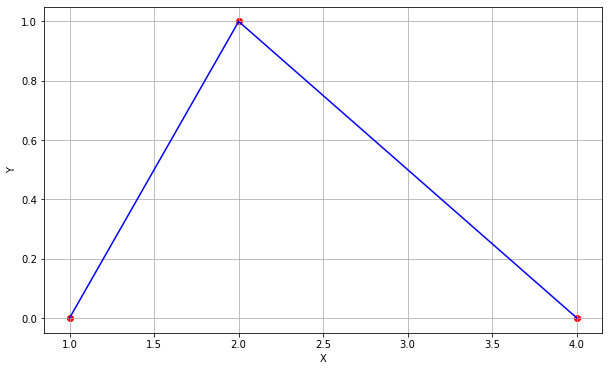

In [136]:
plot_sef(A)

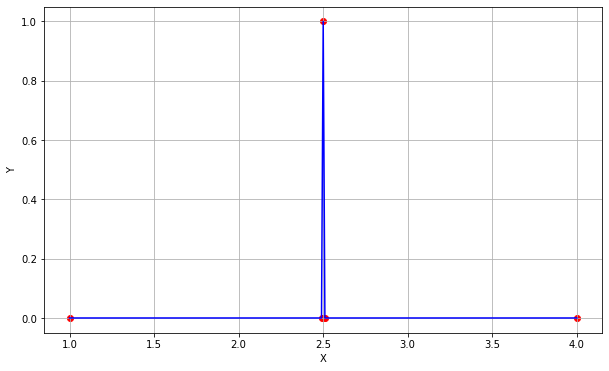

In [137]:
plot_sef(Ap)

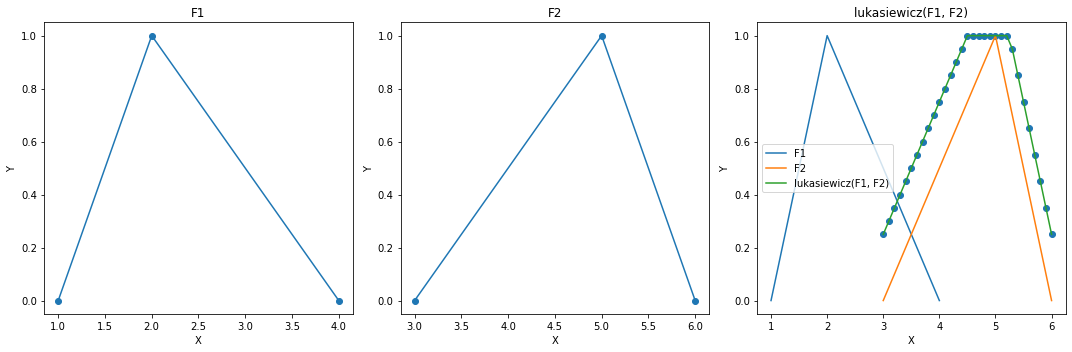

In [139]:
B = [(3, 0), (5, 1), (6, 0)]

A_B = MPG(A, B, Ap, lukasiewicz, TProbabiliste(), 0.1)
plot_sefs(A, B, A_B, func_name="lukasiewicz")

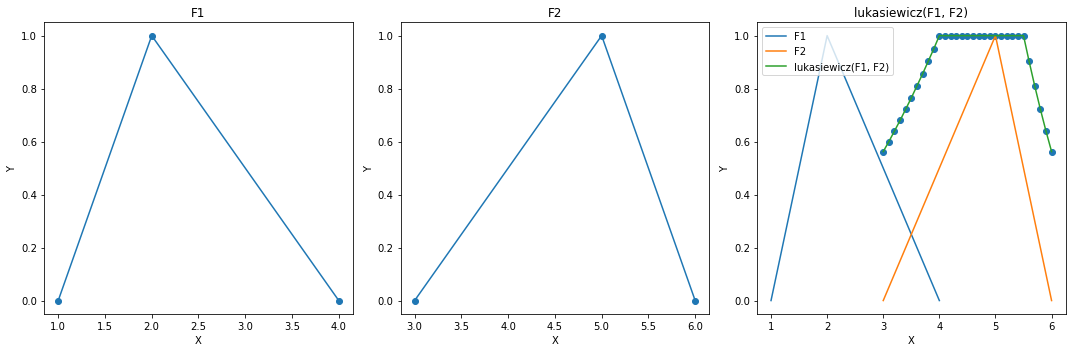

In [143]:
A = [(1, 0), (2, 1), (4, 0)]
Ap = [(2, 0), (3, 1), (5, 0)]
B = [(3, 0), (5, 1), (6, 0)]

A_B = MPG(A, B, Ap, lukasiewicz, TProbabiliste(), 0.1)
plot_sefs(A, B, A_B, func_name="lukasiewicz")

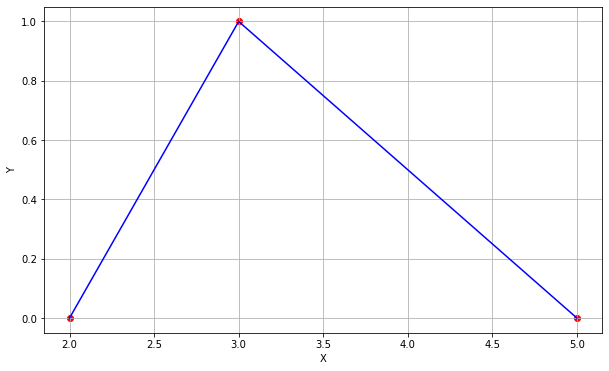

In [144]:
plot_sef(Ap)